Source: https://machinelearningmastery.com/time-series-forecasting-long-short-term-memory-network-python/

In [11]:
from pandas import read_csv
from pandas import to_datetime
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib import pyplot


       Sales
Month       
1-01   266.0
1-02   145.9
1-03   183.1
1-04   119.3
1-05   180.3


/var/folders/53/qnjj4y2x2f5c7q7cjjjhsm040000gn/T/ipykernel_44494/832293104.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  series = read_csv('shampoo.csv', header=0, parse_dates=[0], index_col=0)


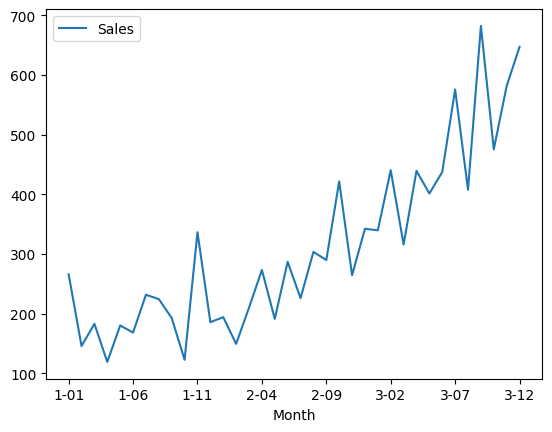

In [12]:
# load and plot dataset
def parser(x):
	return to_datetime.strptime('190'+x, '%Y-%m')
series = read_csv('shampoo.csv', header=0, parse_dates=[0], index_col=0)
# summarize first few rows
print(series.head())
# line plot
series.plot()
pyplot.show()

In [13]:
# split data into train and test
X = series.values
train, test = X[0:-12], X[-12:]

In [14]:
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
 # make prediction
 predictions.append(history[-1])
 # observation
 history.append(test[i])

RMSE: 136.761


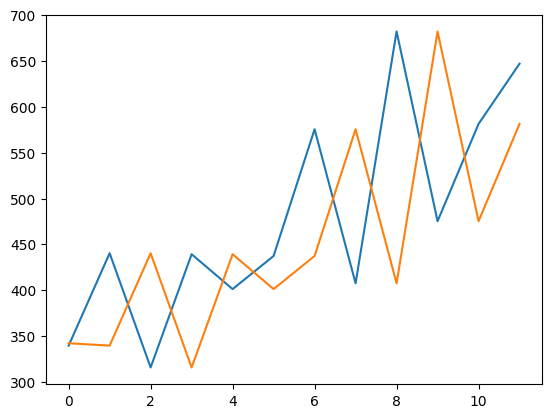

In [15]:
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)
# line plot of observed vs predicted
pyplot.plot(test)
pyplot.plot(predictions)
pyplot.show()

In [16]:
#TODO